# The Sparks Foundation #GRIP21

## Task 6: Prediction using Decision Tree Algorithm

### Aim of the Project: Create the Decision Tree classifier and visualize it graphically.

_What is a decision tree ? Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity_

<img src="25264.png" style="width:800px;height:450px"/>

<font color=red>Author:Hemanth Kumar Bolli</font>

##### For Github File [Click Here]()

##### For YouTube Video [Click Here]()

In [1]:
#Importing The Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
Iris=pd.read_csv('Iris.csv')
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Basic information regarding the data
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
Iris.isnull().sum() #Checking for null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### As there is no missing data, hence we can process the dataset further

In [5]:
Iris.describe() #describe() is used to view some basic statistical details like percentile, mean, std etc.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
Iris.shape # shape function is used to find the length of the dataset

(150, 6)

In [7]:
#Now dropping the Id column, which is unnecessary for further analysis
Iris.drop('Id',axis=1,inplace=True)#axis=1 means removing col wise,inplace=true is used to reflect changes in dataset
Iris.head(n=10)#Again checking for the first 10 rows of dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
#Data points count values for each class labels
Iris.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [9]:
Iris.dtypes #data types

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### Visualisations on target column

Our target column is the species column because, in the end, we want to predict the correct species of flower.

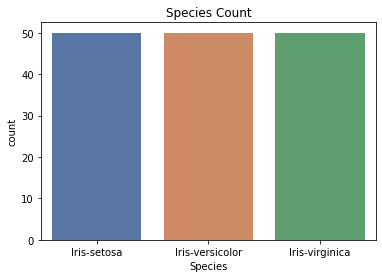

In [10]:
plt.title('Species Count')
sns.countplot(Iris['Species'],palette="deep");

##### This further tells that our dataset is balanced with equal records for all three species.

#### Further, we can visualise this correlation using a heatmap.

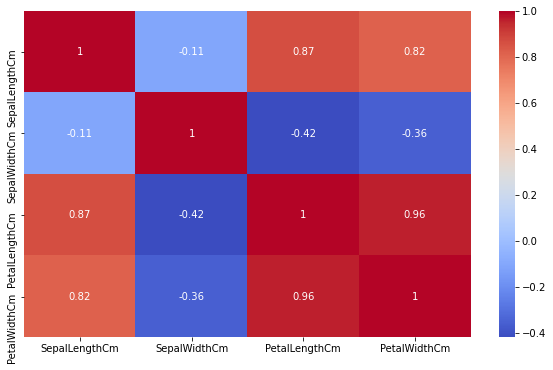

In [11]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(Iris.corr(), cmap='coolwarm', annot = True);

### Univariate Analysis of our columns

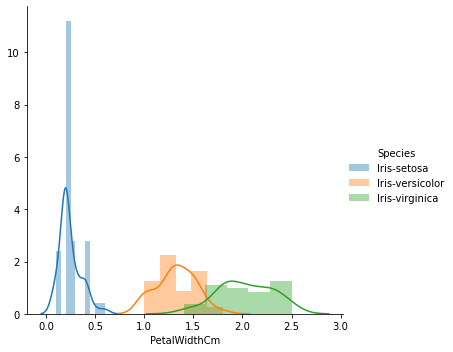

In [12]:
#Petal width
sns.FacetGrid(Iris,hue="Species",height=5).map(sns.distplot,"PetalWidthCm").add_legend();

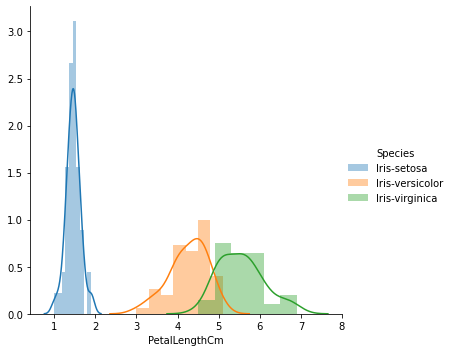

In [13]:
#Petal length
sns.FacetGrid(Iris,hue="Species",height=5).map(sns.distplot,"PetalLengthCm").add_legend();

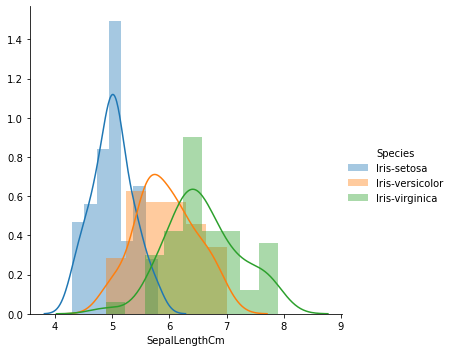

In [14]:
#Sepal length
sns.FacetGrid(Iris,hue="Species",height=5).map(sns.distplot,"SepalLengthCm").add_legend();

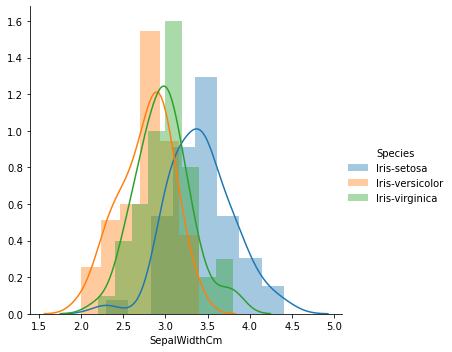

In [15]:
#Sepal Width
sns.FacetGrid(Iris,hue="Species",height=5).map(sns.distplot,"SepalWidthCm").add_legend();

In [16]:
#Dividing the dataset into two parts:X and Y
X=Iris.iloc[:,0:4].values
Y=Iris.iloc[:,4].values

In [17]:
#Label encoding and onehotencoding for Categorical column(species=Target variable)
#Here basically converting the characters into 0's and 1's using below syntax
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label=LabelEncoder()
Y=label.fit_transform(Y)
Y_updated=pd.DataFrame(Y)
onehotencoder=OneHotEncoder(categories="auto")
Y_updated=onehotencoder.fit_transform(Y_updated).toarray()

In [18]:
Y_updated

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [19]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

#### Feature Scaling: Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [20]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
Iris=StandardScaler()
X_train=Iris.fit_transform(X_train)
X_test=Iris.fit_transform(X_test)

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=100,splitter='best')
clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=100)

In [22]:
# prediction on random data
X=[[6.4,1.8 ,6.6 ,2.1]]
Y_pred=clf.predict(X)
print(Y_pred)
# prediction on X_test (testing data )
Y_pred=clf.predict(X_test)
print(Y_pred)

[2]
[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 1 2 2 2 0 2 0 1 2 1 0 1 2]


##### Here we used our trained model to make prediction. As you see in the output first we make prediction on random sample (take a iris flower and measure the features of mentioned ) to understand how model work. We put random values (4 feature values) and make prediction, And we get the category 2 means the flower that we have belongs to Verginica category of iris family. In next step we tested our model on test data. which have 30% samples of total datasets.

In [23]:
#Loading few more required libraries:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import six

In [24]:
#Accuracy of the model
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
confusion_matrix=(confusion_matrix(Y_test,Y_pred))
confusion_matrix

Accuracy: 1.0


array([[11,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 13]], dtype=int64)

#### Tree Plotting / Decision Making in Decision Tree


[Text(133.92000000000002, 199.32, 'X[2] <= -0.746\ngini = 0.665\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[3] <= 0.623\ngini = 0.496\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(66.96000000000001, 126.83999999999999, 'X[2] <= 0.712\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(100.44000000000001, 90.6, 'X[3] <= 0.488\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 54.359999999999985, 'X[2] <= 1.003\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(167.40000000000003, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.84000

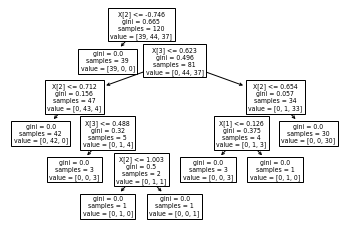

In [25]:
#Visualizing the tree structure
tree.plot_tree(clf)

In [26]:
#Decision making in decision tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= -0.75
|   |--- class: 0
|--- feature_2 >  -0.75
|   |--- feature_3 <= 0.62
|   |   |--- feature_2 <= 0.71
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.71
|   |   |   |--- feature_3 <= 0.49
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  0.49
|   |   |   |   |--- feature_2 <= 1.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  1.00
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  0.62
|   |   |--- feature_2 <= 0.65
|   |   |   |--- feature_1 <= 0.13
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.13
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.65
|   |   |   |--- class: 2



### This is just a simple representation of feature extraction and decision making in decision tree classifier.

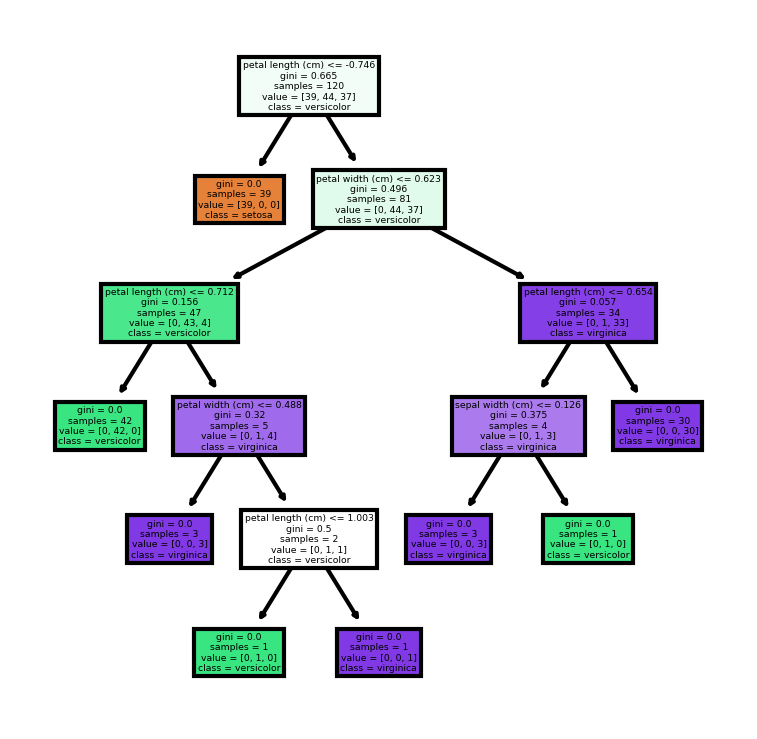

In [27]:
#Final decision tree build for deploying in real world cases
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

# Visualize the graph
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

##### **You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**

### Thank you for watching !!

<img src="source.gif" style="width:800px;height:450px"/>